In [14]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('email.csv')
df.sample(5)

C:\Users\unfri\AppData\Local\Temp\ipykernel_6972\620013736.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 412,Unnamed: 413,Unnamed: 414,Unnamed: 415,Unnamed: 416,Unnamed: 417,Unnamed: 418,Unnamed: 419,Unnamed: 420,Unnamed: 421
34377,ham,add escapenumber library mass lda escapenumber...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,spam,fascinate gym turning different ticket miles s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67852,spam,hi i am tired this evening i am escapenumber y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19173,ham,on escapenumber escapenumber escapenumber ken ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98015,spam,anatrim escapenumber the up to the moment and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 1. Data Cleaning
columns_to_drop = [f'Unnamed: {i}' for i in range(2, 422)]
df.drop(columns=columns_to_drop, inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

In [32]:
# 2. EDA
print(df.sample(5))
print(df.shape)

       target                                               text
51713     0.0  author metze date escapenumber escapenumber es...
97359     1.0  become a student of change it is the only thin...
36891     1.0  downloadable software ds is a rapidly growing ...
87868     1.0  hey !\nwe have a n - e - w product that we off...
64489     NaN                                                NaN
(103534, 2)


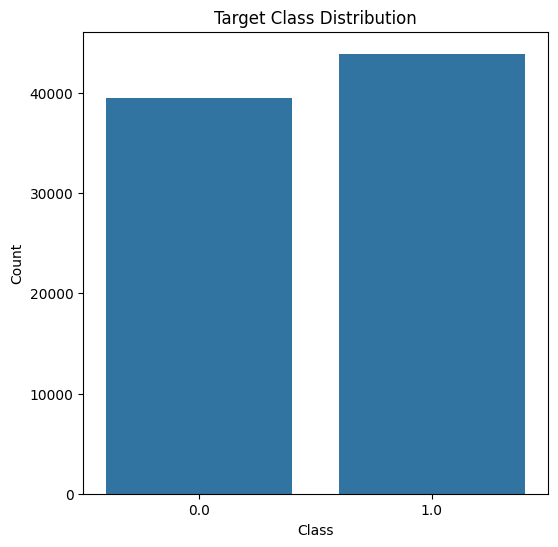

In [41]:
# Check target class distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='target')
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

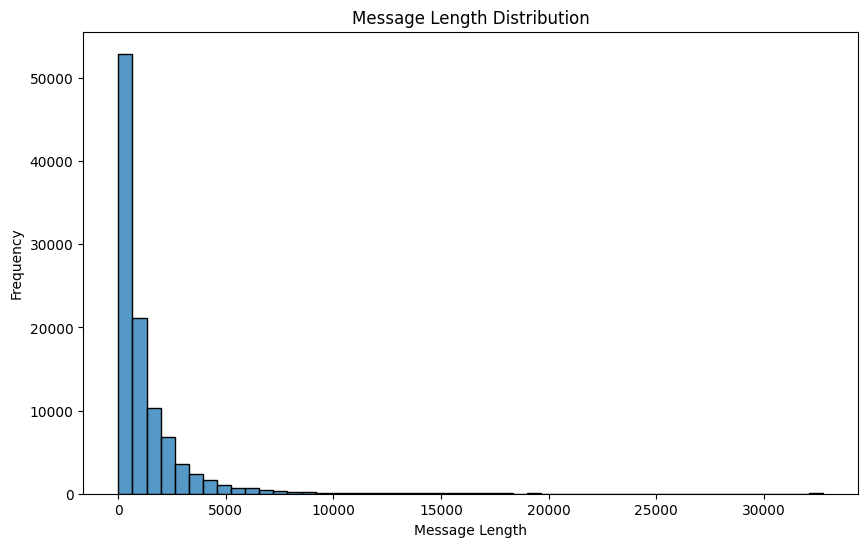

In [40]:
# Check the length distribution of messages
df['text_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

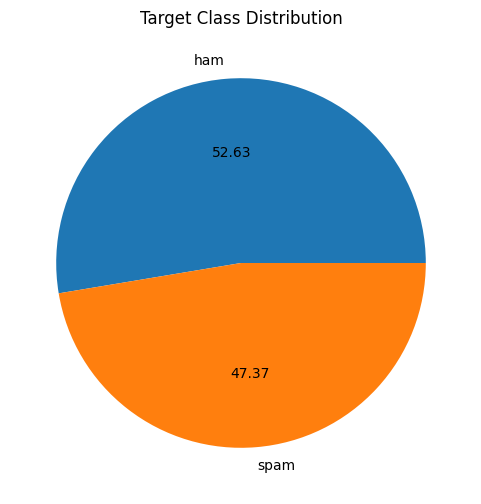

In [39]:
# Visualization: Pie chart of target class distribution
plt.figure(figsize=(6, 6))
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.title('Target Class Distribution')
plt.show()

In [35]:
# Text Preprocessing
def transform_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = nltk.word_tokenize(text)
        ps = PorterStemmer()
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
        
        return " ".join(y)
    else:
        return ""

df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
# Text Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [45]:
# Model Building

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Handling NaN values in the target variable
nan_indices_train = np.isnan(y_train)
nan_indices_test = np.isnan(y_test)
print("NaN values in y_train:", nan_indices_train.any())
print("NaN values in y_test:", nan_indices_test.any())

# Remove rows with NaN values from both X_train, y_train, X_test, and y_test
X_train_cleaned = X_train[~nan_indices_train]
y_train_cleaned = y_train[~nan_indices_train]
X_test_cleaned = X_test[~nan_indices_test]
y_test_cleaned = y_test[~nan_indices_test]

# Now fit the model with the cleaned data
mnb = MultinomialNB()
mnb.fit(X_train_cleaned, y_train_cleaned)
y_pred = mnb.predict(X_test_cleaned)

NaN values in y_train: True
NaN values in y_test: True


In [46]:
# Evaluation
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred))
print("Precision:", precision_score(y_test_cleaned, y_pred))

Accuracy: 0.9557463672391017
Confusion Matrix:
[[7607  410]
 [ 327 8310]]
Precision: 0.9529816513761468


In [47]:
# Save the model and vectorizer
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))